In [1]:
# Simple script for running Covasim scenarios
# Github Repo = https://covasim.org
# Source Code = https://github.com/InstituteforDiseaseModeling/covasim/blob/main/examples/run_scenarios.py

In [2]:
# Import Covasim Library
import covasim as cv

Covasim 3.1.5 (2023-12-15) — © 2020-2022 by IDM


In [3]:
# Run options
do_plot = 1
do_show = 1
verbose = 1

In [4]:
# Sim options
basepars = dict(
  pop_size = 2000,
  verbose = verbose,
)

In [5]:
# Scenario metaparameters
metapars = dict(
    n_runs    = 3, # Number of parallel runs; change to 3 for quick, 11 for real
    noise     = 0.1, # Use noise, optionally
    noisepar  = 'beta',
    rand_seed = 1,
    quantiles = {'low':0.1, 'high':0.9},
)

In [6]:
# Define the actual scenarios
start_day = '2023-12-30' # Changed the data to today()'s run date = 12/30/2023

scenarios = {'baseline': {
              'name':'Baseline',
              'pars': {
                  'interventions': None,
                  }
              },
            'distance': {
              'name':'Social distancing',
              'pars': {
                  'interventions': cv.change_beta(days=start_day, changes=0.7)
                  }
              },
            'ttq': {
              'name':'Test-trace-quarantine',
              'pars': {
                  'interventions': [
                        cv.test_prob(start_day=start_day, symp_prob=0.2, asymp_prob=0.05, test_delay=1.0),
                        cv.contact_tracing(start_day=start_day, trace_probs=0.8, trace_time=1.0),
                    ]
                  }
              },
             }

Multirun for baseline
Processing baseline
Multirun for distance
Processing distance
Multirun for ttq
Processing ttq
Results for the last day in each scenario:
                            baseline distance     ttq
cum_infections                2120.0   2120.0  2120.0
cum_reinfections               322.0    322.0   322.0
cum_infectious                2050.0   2050.0  2050.0
cum_symptomatic               1317.0   1317.0  1317.0
cum_severe                      81.0     81.0    81.0
...                              ...      ...     ...
new_symptomatic_by_variant0      5.0      5.0     5.0
new_severe_by_variant0           0.0      0.0     0.0
new_infectious_by_variant0      23.0     23.0    23.0
n_exposed_by_variant0          460.0    460.0   460.0
n_infectious_by_variant0       383.0    383.0   383.0

[70 rows x 3 columns]


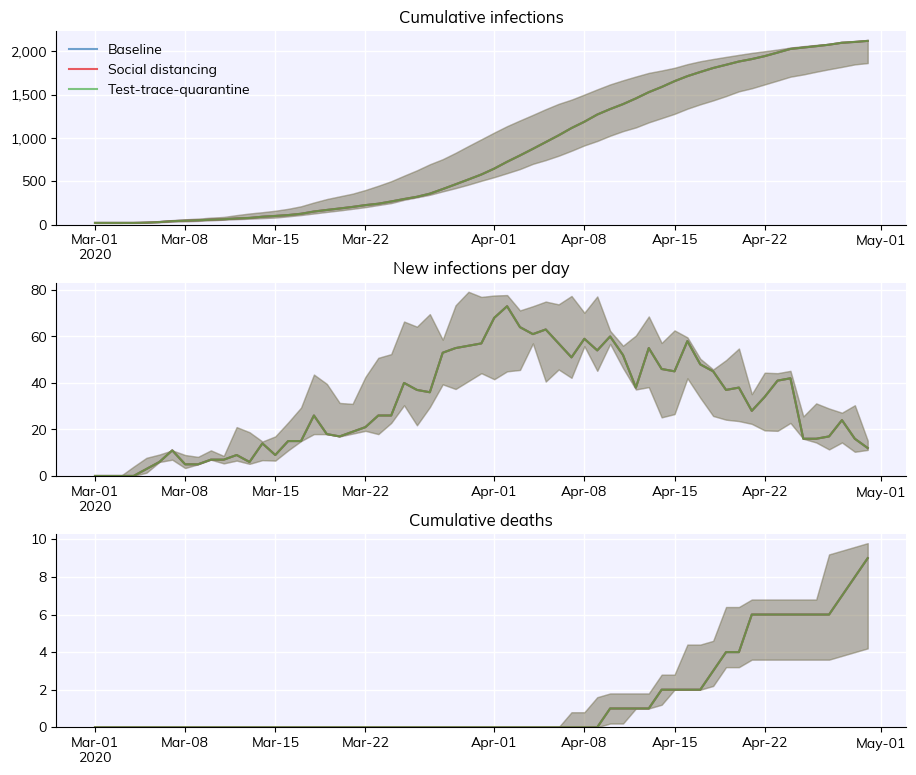

In [7]:
# Parallel Processing
# Run the scenarios -- this block is required for parallel processing on Windows
if __name__ == "__main__":

    scens = cv.Scenarios(basepars=basepars, metapars=metapars, scenarios=scenarios)
    scens.run(verbose=verbose)
    if do_plot:
        fig1 = scens.plot(do_show=do_show)